# Basic Examples of _findiff_

_findiff_ works in any dimension. But for the sake of demonstration, let's concentrate on the cases 1D and 3D. We are using uniform, i.e. equidistant, grids here. The non-uniform case will be shown in another notebook.

## Preliminaries

Our imports:

In [11]:
import numpy as np

from findiff import Diff
import matplotlib.pyplot as plt

## Simple 1D Cases

Suppose we want to differentiate two 1D-arrays `f` and `g`, which are filled with values from a function

$$
f(x) = \sin(x) \quad \text{and}\quad g(x) = \cos(x)
$$

and we want to take the 2nd derivative. This is easy done analytically:

$$
\frac{d^2f}{dx^2} = -\sin(x) \quad \text{and}\quad \frac{d^2g}{dx^2} = -\cos(x)
$$

Let's do this numerically with _findiff_. First we set up the grid and the arrays:

In [17]:
x = np.linspace(0, 10, 100)
dx = x[1] - x[0]
f = np.sin(x)
g = np.cos(x)

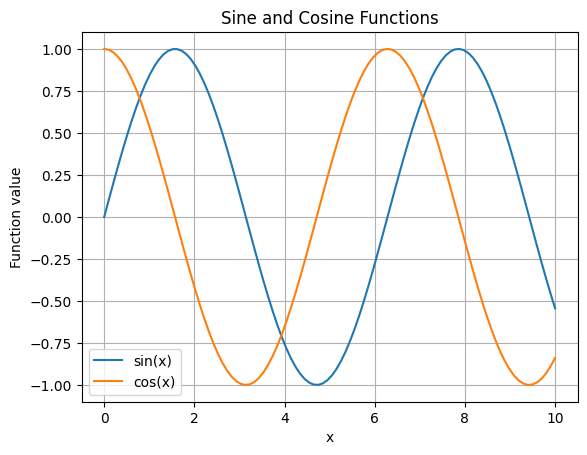

In [18]:
plt.plot(x, f, label='sin(x)')
plt.plot(x, g, label='cos(x)')
plt.legend()
plt.title('Sine and Cosine Functions')
plt.xlabel('x')
plt.ylabel('Function value')
plt.grid()
plt.show()

Then we construct the derivative object, which represents the differential operator $\frac{d^2}{dx^2}$:

In [22]:
d2_dx2 = Diff(0, dx, acc=2)**2

The first parameter is the axis along which to take the derivative. Since we want to apply it to the one and only axis of the 1D array, this is a 0. The second parameter is the grid spacing, the third parameter the derivative order you want, in our case 2. If you want a first derivative, you can skip the third argument as it defaults to 1.

Then we apply the operator to f and g, respectively:

In [23]:
result_f = d2_dx2(f)
result_g = d2_dx2(g)

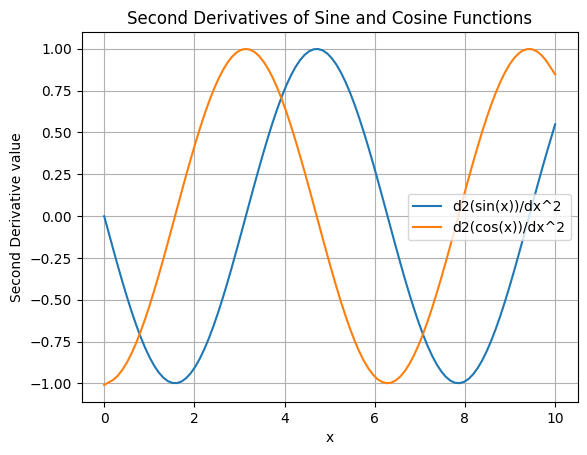

In [24]:
plt.plot(x, result_f, label='d2(sin(x))/dx^2')
plt.plot(x, result_g, label='d2(cos(x))/dx^2')
plt.legend()
plt.title('Second Derivatives of Sine and Cosine Functions')
plt.xlabel('x')
plt.ylabel('Second Derivative value')
plt.grid()
plt.show()

That's it! The arrays `result_f`and `result_g` have the same shape as the arrays `f` and `g` and contain the values of the second derivatives.

#### Finite Difference Coefficients

By default the `FinDiff` class uses second order accuracy. For the second derivative, it uses the following finite difference coefficients:

In [7]:
from findiff import coefficients

coefficients(deriv=2, acc=2)

{'center': {'coefficients': array([ 1., -2.,  1.]),
  'offsets': array([-1,  0,  1]),
  'accuracy': 2},
 'forward': {'coefficients': array([ 2., -5.,  4., -1.]),
  'offsets': array([0, 1, 2, 3]),
  'accuracy': 2},
 'backward': {'coefficients': array([-1.,  4., -5.,  2.]),
  'offsets': array([-3, -2, -1,  0]),
  'accuracy': 2}}

But `FinDiff` can handle any accuracy order. For instance, have you ever wondered, what the 10th order accurate coefficients look like? Here they are:

In [8]:
coefficients(deriv=2, acc=10)

{'center': {'coefficients': array([ 3.17460317e-04, -4.96031746e-03,  3.96825397e-02, -2.38095238e-01,
          1.66666667e+00, -2.92722222e+00,  1.66666667e+00, -2.38095238e-01,
          3.96825397e-02, -4.96031746e-03,  3.17460317e-04]),
  'offsets': array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5]),
  'accuracy': 10},
 'forward': {'coefficients': array([   7.56163106,  -44.43733488,  138.59338192, -295.52014839,
          457.03027109, -521.11394092,  439.39497337, -271.26223908,
          119.41384033,  -35.55163256,    6.42373843,   -0.53254037]),
  'offsets': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
  'accuracy': 1},
 'backward': {'coefficients': array([  -0.53253968,    6.42373016,  -35.55158728,  119.41369042,
         -271.26190464,  439.39444426, -521.11333313,  457.02976175,
         -295.51984119,  138.59325394,  -44.43730158,    7.56162698]),
  'offsets': array([-11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0]),
  'accuracy': 7}}

#### Accuracy order

If you want to use for example 10th order accuracy, just tell the `FinDiff` constructor to use it:

In [9]:
from findiff import FinDiff

d2_dx2 = FinDiff(0, dx, 2, acc=10)
result = d2_dx2(f)

## Simple 3D Cases

Now let's differentiate a 3D-array `f` representing the function

$$
f(x, y, z) = \sin(x) \cos(y) \sin(z) 
$$


In [25]:
x, y, z = [np.linspace(0, 10, 100)]*3
dx, dy, dz = x[1] - x[0], y[1] - y[0], z[1] - z[0]
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
f = np.sin(X) * np.cos(Y) * np.sin(Z)

The partial derivatives $\frac{\partial f}{\partial x}$ or $\frac{\partial f}{\partial z}$ are given by

In [26]:
d_dx = FinDiff(0, dx)
d_dz = FinDiff(2, dz)

The x-axis is the 0th axis, y, the first, z the 2nd, etc. The third mixed partial derivative $\frac{\partial^3 f}{\partial x^2 \partial y}$ is specified by two tuples as arguments, one for each partial derivative:

In [27]:
d3_dx2dy = FinDiff((0, dx, 2), (1, dy))
result = d3_dx2dy(f)

Of course, the accuracy order can be specified the same way as for 1D.

## General Linear Differential Operators

`FinDiff` objects can bei added and easily multiplied by numbers. For example, to express

$$
\frac{\partial^2}{\partial x^2} + 2\frac{\partial^2}{\partial x \partial y} + \frac{\partial^2}{\partial y^2} =
\left(\frac{\partial}{\partial x} + \frac{\partial}{\partial y}\right) \left(\frac{\partial}{\partial x} + \frac{\partial}{\partial y}\right)
$$

we can say

In [28]:
linear_op = FinDiff(0, dx, 2) + 2 * FinDiff((0, dx), (1, dy)) + FinDiff(1, dy, 2)

#### Variable Coefficients

If you want to multiply by variables instead of plain numbers, you have to encapsulate the variable in a `Coefficient` object. For example, 

$$
x \frac{\partial}{\partial x} + y^2 \frac{\partial}{\partial y}
$$

is

In [29]:
from findiff import Coefficient

linear_op = Coefficient(X) * FinDiff(0, dx) + Coefficient(Y**2) * FinDiff(1, dy)

Applying those general operators works the same way as for the simple derivatives:

In [30]:
result = linear_op(f)